# RL tabular MM analysis
Set parameters, optionally run `config` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

params = {
    # run controls
    'run_rl': True,
    'run_simple': True,

    # core config
    'config': 'config',
    'ticker': 'AAPL',
    'date': '20000101',
    'start': '00:00:00',
    'end': '24:00:00',
    'seed': 4424,

    # market makers
    'mm_type': 'RLMM1',
    'mm_type_simple': 'none',
    'mm_wake': '3s',
    'mm_size': 1,
    'mm_inventory_limit': 100,

    # OU / fundamentals
    'fund_vol': 5e-9,           # sigma_s in oracle diffusion off below
    'ou_half_life': '30m',
    'value_r_bar': 100_000,     # cents ($1000)
    'value_sigma_n': None,
    'value_kappa': 3.85e-13,    # ln(2)/30m per ns
    'value_lambda_a': None,
    'sigma_s': 0,               # diffusion term off

    # megashock (oracle) settings
    'megashock_lambda_a': 2.7e-18,
    'megashock_mean': 1e3,
    'megashock_var': 5e4,

    # logging
    'log_name': 'RLMM1_seed_123456',
    'simple_log_name': 'simple_seed_123456',

    # noise traders
    'noise_count': 10,
    'noise_cash': 10_000_000,
    'noise_order_block': 1,
    'noise_wake_freq': '10s',

    # value traders
    'value_count': 0,
    'value_cash': 10_000_000,

    # ZI traders
    'zi_count': 0,
    'zi_cash': 10_000_000,
    'zi_sigma_n': 10_000,
    'zi_sigma_s': None,
    'zi_kappa': None,
    'zi_r_bar': None,
    'zi_q_max': 10,
    'zi_sigma_pv': 5e4,
    'zi_R_min': 0,
    'zi_R_max': 100,
    'zi_eta': 1.0,
    'zi_lambda_a': 1e-12,

    # HBL / momentum
    'hbl_count': 0,
    'momentum_count': 0,
    'momentum_cash': 10_000_000,
    'momentum_min_size': 1,
    'momentum_max_size': 10,
    'momentum_wake': '20s',
}

repo_root = Path('..')
params['log_dir'] = repo_root / 'log' / params['log_name']
params['simple_log_dir'] = repo_root / 'log' / params['simple_log_name']

print('RL log dir:', params['log_dir'].resolve())
print('Simple log dir:', params['simple_log_dir'].resolve())


RL log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/RLMM1_seed_123456
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/simple_seed_123456


## Run simulation (optional)

In [2]:
def add_opt(cmd, flag, value):
    if value is not None:
        cmd.extend([flag, str(value)])

if params['run_rl']:
    cmd = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['log_name'],
        '--mm-type', params['mm_type'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd, '--value-kappa', params['value_kappa'])
    add_opt(cmd, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd, '--zi-r-bar', params['zi_r_bar'])
    print('Running RL:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('RL return code:', result.returncode)
else:
    print('Skipping RL run; set params["run_rl"] = True to execute.')

if params['run_simple']:
    cmd_simple = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['simple_log_name'],
        '--mm-type', params['mm_type_simple'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd_simple, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd_simple, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd_simple, '--value-kappa', params['value_kappa'])
    add_opt(cmd_simple, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd_simple, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd_simple, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd_simple, '--zi-r-bar', params['zi_r_bar'])
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Simple return code:', result_simple.returncode)
else:
    print('Skipping simple MM run; set params["run_simple"] = True to execute.')

Running RL: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:00 --end-time 24:00:00 --seed 4424 --log_dir RLMM1_seed_123456 --mm-type RLMM1 --mm-wake-up-freq 3s --mm-size 1 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 10 --noise-cash 10000000 --noise-order-block 1 --value-count 0 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 3.85e-13
Beginning of the simulation

[config] start_wall=2025-12-06 20:21:37.181724
[config] seed=4424

[kernel] t=2001-01-01 00:00:00 processed=0
[kernel] t=2001-01-01 03:40:30 processed=100000
[kernel] t=2001-01-01 07:21:09 processed=200000
[kernel] t=2001-01-01 11:01:42 processed=300000
[kernel] t=2001-01-01 14:42:18 processed=400000
[kernel] t=2001-01-01 18:

Processing orderbook log: 100%|██████████| 76787/76787 [00:00<00:00, 99772.34it/s] 


[exchange] order book logging duration: 0:00:01.395198
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:59.146536 messages=652882 rate=11038.4/s
[kernel] simulation ending
[config] end_wall=2025-12-06 20:22:45.029035
[config] duration=0:01:07.847311
RL return code: 0
Running simple MM: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:00 --end-time 24:00:00 --seed 4424 --log_dir simple_seed_123456 --mm-type none --mm-wake-up-freq 3s --mm-size 1 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 10 --noise-cash 10000000 --noise-order-block 1 --value-count 0 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 3.85e-13
Beginning of the simulation

[config] start_wall=2025-

### MTM comparison (RL vs simple)


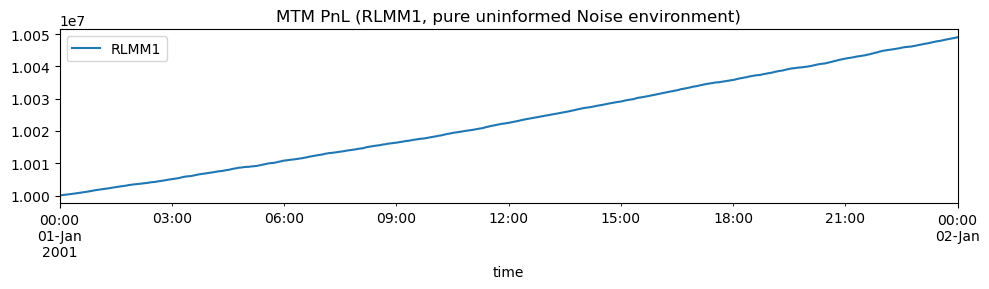

In [3]:
# MTM comparison (aligned on time index)
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = sorted(log_dir.glob('RL_MM1_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_files = sorted(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('RLMM1'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RLMM1, pure uninformed Noise environment)'
    ax = df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found; nothing to plot')


### Inventory comparison (RL vs simple)


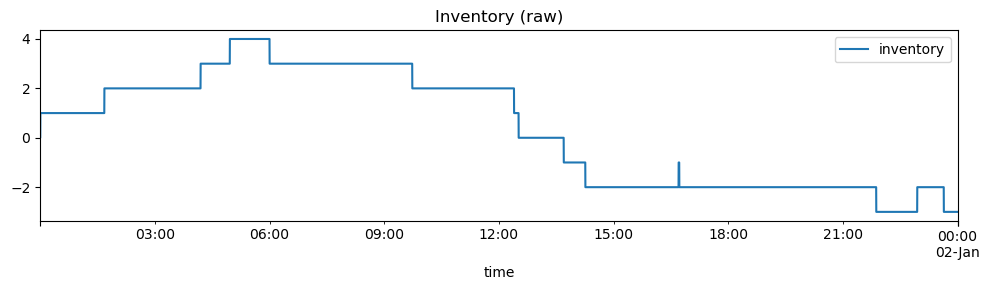

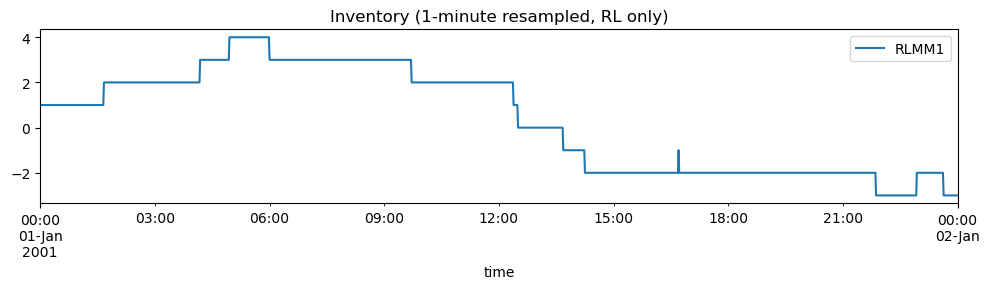

In [4]:
# Plot inventories on common time grid
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = list(log_dir.glob('RL_MM1_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_state_rows = None
if simple_log_dir:
    simple_files = list(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if simple_state_rows is not None and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

# Plot raw inventories
if rl_state is not None:
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory (raw)', label='RLMM1')
    if simple_state is not None:
        simple_state[['inventory']].plot(ax=ax, label='simpleMM')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid
series = []
if rl_state is not None:
    series.append(rl_state['inventory'].rename('RLMM1'))
if simple_state is not None:
    series.append(simple_state['inventory'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'Inventory comparison (1-minute resampled)' if len(series) > 1 else 'Inventory (1-minute resampled, RL only)'
    df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No inventory series available to plot')


### Spread over time (RL)


No SIMPLE_MM_*.bz2 found in ../log/simple_seed_123456


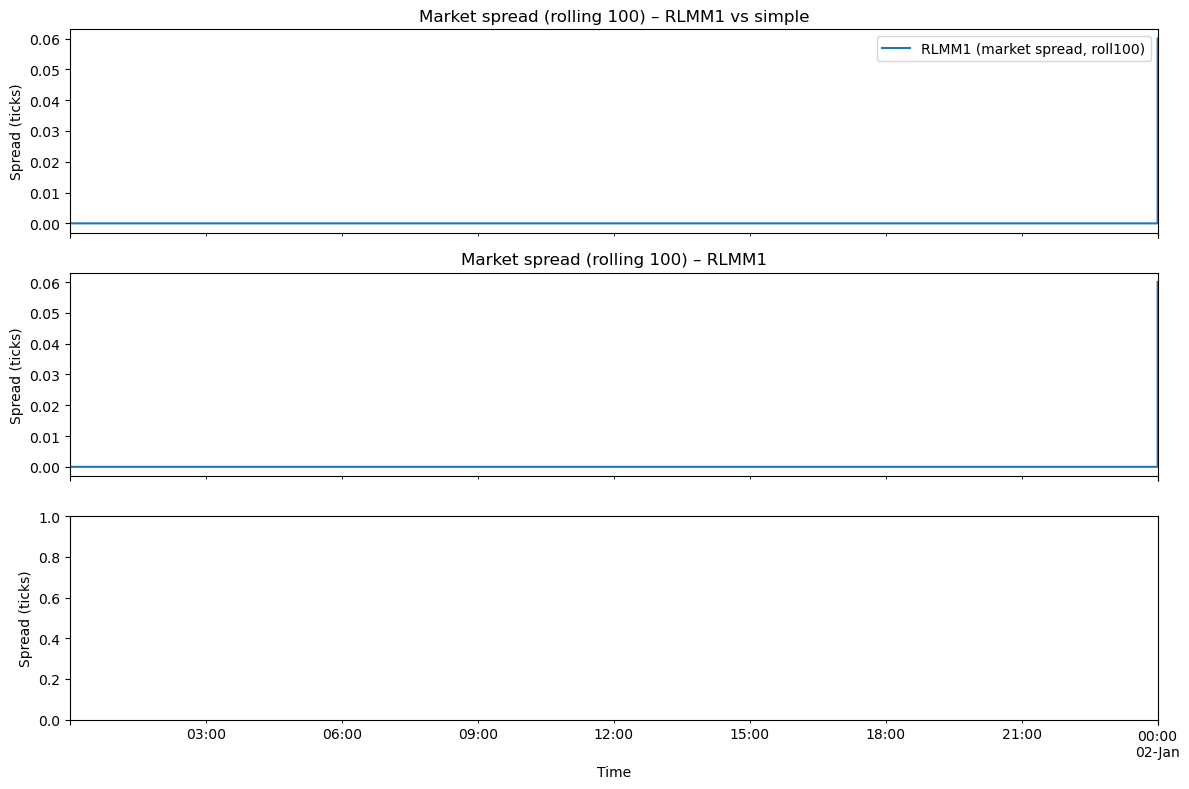

In [5]:
from pathlib import Path

def market_spread_roll(log_dir: Path, pattern: str, label: str, window=100):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'spread' not in df.columns:
        print(f"No 'spread' field in {files[0].name}")
        return None
    return df['spread'].rolling(window=window, min_periods=1).mean().rename(label)

rl_spread = market_spread_roll(params['log_dir'], 'RL_MM1_*.bz2', 'RLMM1 (market spread, roll100)')
simple_spread = market_spread_roll(params['simple_log_dir'], 'SIMPLE_MM_*.bz2', 'simpleMM (market spread, roll100)')

series = [s for s in [rl_spread, simple_spread] if s is not None]
if series:
    df = pd.concat(series, axis=1).sort_index()

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    df.plot(ax=axes[0], title='Market spread (rolling 100) – RLMM1 vs simple', legend=True)
    if rl_spread is not None:
        df[['RLMM1 (market spread, roll100)']].plot(ax=axes[1], title='Market spread (rolling 100) – RLMM1', legend=False)
    if simple_spread is not None:
        df[['simpleMM (market spread, roll100)']].plot(ax=axes[2], title='Market spread (rolling 100) – simpleMM', legend=False)

    for ax in axes:
        ax.set_ylabel('Spread (ticks)')
    axes[-1].set_xlabel('Time')
    plt.tight_layout()
else:
    print('No spread data found to plot')


### Rewards and PnL per step

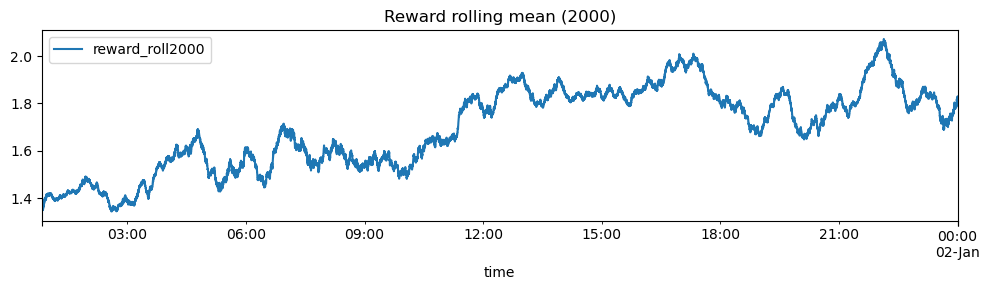

In [6]:
window = 2000

if rl_state is not None and not rl_state.empty:
    # Step reward
    # rl_state['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    # plt.legend()
    # plt.tight_layout()

    # Rolling mean (100)
    rl_state['reward'].rolling(window=window, min_periods=1).mean()[1000:].plot(figsize=(10,3), title=f'Reward rolling mean ({window})', label=f'reward_roll{2000}')
    plt.legend()
    plt.tight_layout()

    # Cumulative reward
    # rl_state['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    # plt.legend()
    # plt.tight_layout()
else:
    print('No STATE events found in RL log')


<Axes: xlabel='time'>

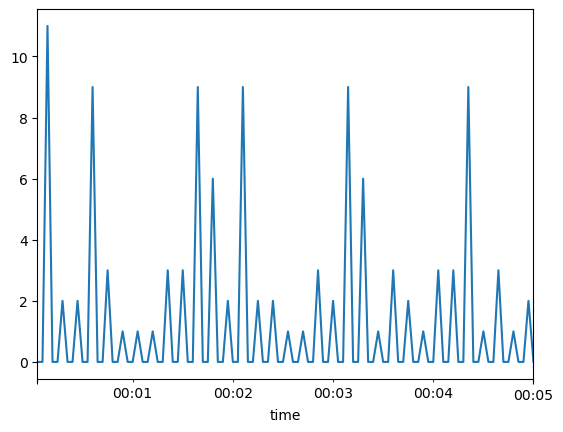

In [7]:
rl_state['reward'][:100].plot()

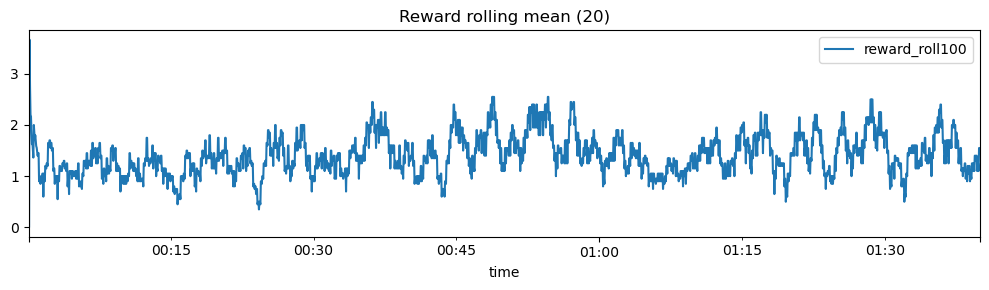

In [8]:
window = 20

if rl_state is not None and not rl_state.empty:

    rl_state['reward'].rolling(window=window, min_periods=1).mean()[:2000].plot(figsize=(10,3), title=f'Reward rolling mean ({window})', label='reward_roll100')
    plt.legend()
    plt.tight_layout()

### Actions over time and Q proxy

/var/folders/4d/b_50cxsx369cdz1pzpjf8md40000gn/T/ipykernel_28374/3640537457.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq='5T'))


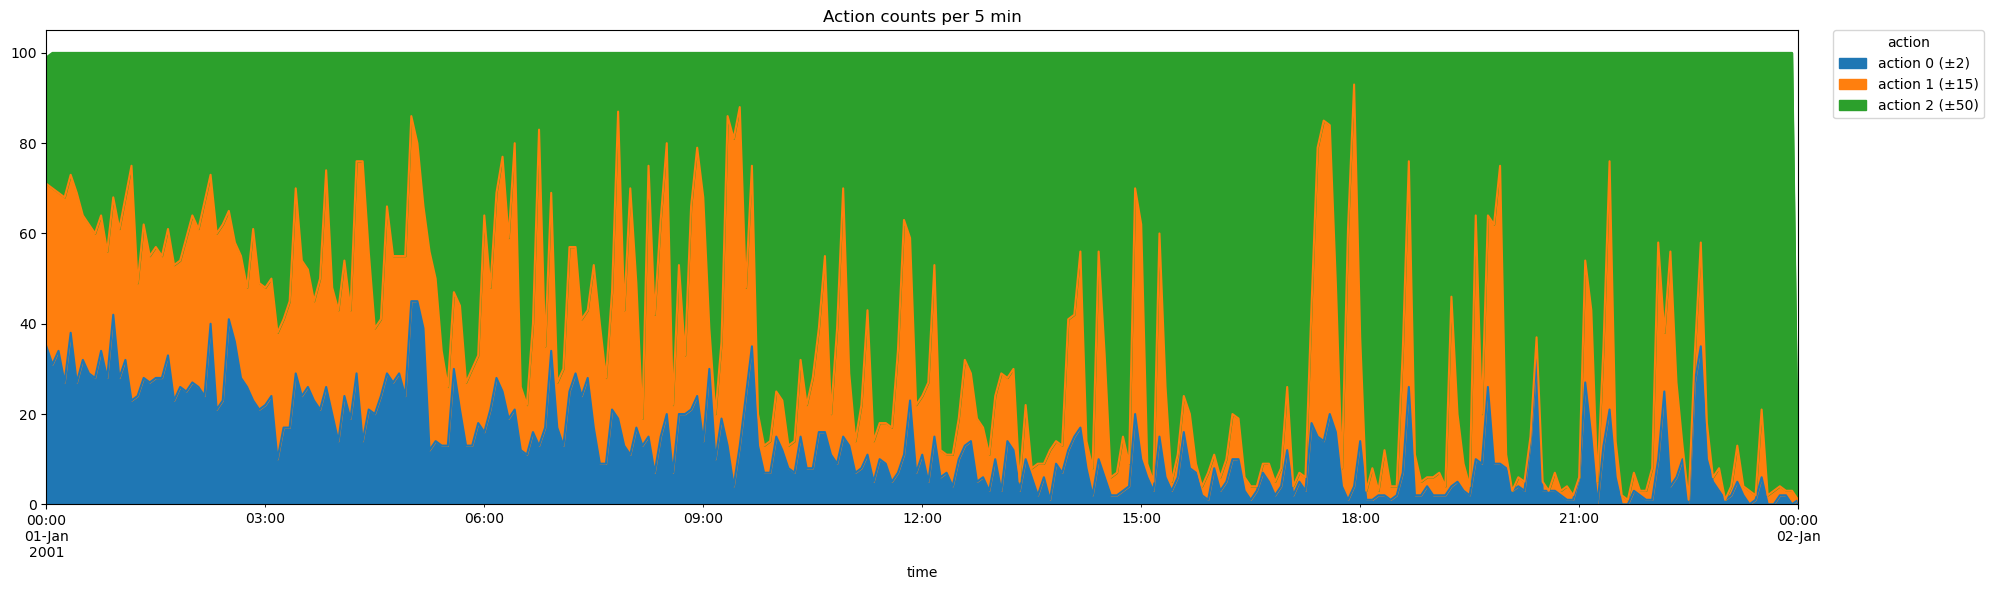

In [9]:
# Build action label map for RLMM1 (symmetric offsets)
offsets = [2, 15, 50]  # keep in sync with RLMM1 config
action_labels = {i: f"action {i} (±{o})" for i, o in enumerate(offsets)}


# Use RL state
state_df = rl_state.copy() if rl_state is not None else pd.DataFrame()
if 'time' in state_df.columns:
    state_df['time'] = pd.to_datetime(state_df['time'])
    state_df = state_df.set_index('time')
state_df = state_df.sort_index()

if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    action_counts = action_counts.rename(columns=action_labels)
    ax = action_counts.plot.area(figsize=(20, 6), title='Action counts per 5 min')
    ax.legend(title='action', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


### State visitation heatmap

No SIMPLE_MM_*.bz2 found in ../log/simple_seed_123456


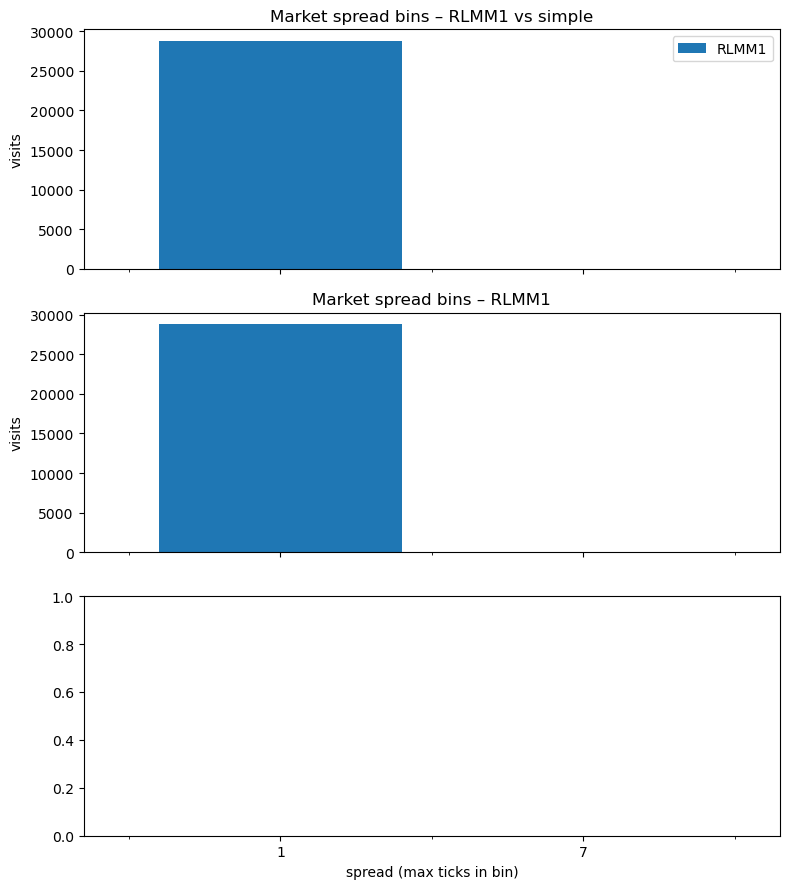

In [10]:
spread_bin_size = 1  # ticks

def spread_bins_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event']))
    if 'spread' not in df.columns:
        print(f"No 'spread' field in {files[0].name}")
        return None
    bins = (df['spread'].clip(lower=0) // spread_bin_size).astype(int)
    return bins.value_counts().sort_index().rename(label)

rl_bins = spread_bins_from_state(params['log_dir'], 'RL_MM1_*.bz2', 'RLMM1')
simple_bins = spread_bins_from_state(params['simple_log_dir'], 'SIMPLE_MM_*.bz2', 'simpleMM')

series = [s for s in [rl_bins, simple_bins] if s is not None]
if series:
    all_bins = sorted(set().union(*[s.index for s in series]))
    aligned = [s.reindex(all_bins, fill_value=0) for s in series]
    spr_labels = [(b + 1) * spread_bin_size for b in all_bins]

    fig, axes = plt.subplots(3, 1, figsize=(8, 9), sharex=True)

    pd.concat(aligned, axis=1).plot(kind='bar', ax=axes[0], width=0.8)
    axes[0].set_title('Market spread bins – RLMM1 vs simple')
    axes[0].set_ylabel('visits')

    if rl_bins is not None:
        aligned[0].plot(kind='bar', ax=axes[1], width=0.8, color='C0', legend=False)
        axes[1].set_title('Market spread bins – RLMM1')
        axes[1].set_ylabel('visits')

    if simple_bins is not None and len(aligned) > 1:
        aligned[1].plot(kind='bar', ax=axes[2], width=0.8, color='C1', legend=False)
        axes[2].set_title('Market spread bins – simpleMM')
        axes[2].set_ylabel('visits')

    axes[-1].set_xticks(range(len(all_bins)))
    axes[-1].set_xticklabels(spr_labels, rotation=0)
    axes[-1].set_xlabel('spread (max ticks in bin)')
    plt.tight_layout()
else:
    print('No STATE events found to plot')


No SIMPLE_MM_*.bz2 found in ../log/simple_seed_123456


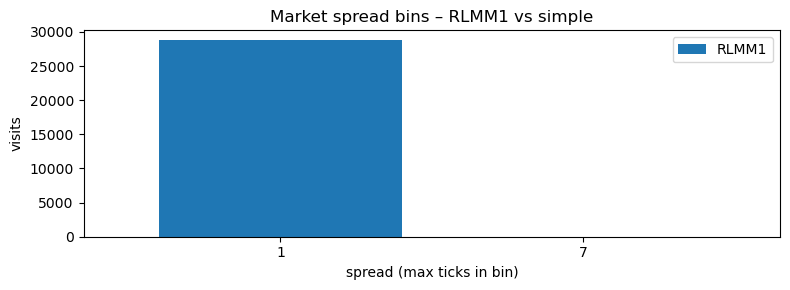

In [11]:
# Cell 1 — combined RLMM1 vs simpleMM
spread_bin_size = 1  # ticks

def spread_bins_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event']))
    if 'spread' not in df.columns:
        print(f"No 'spread' field in {files[0].name}")
        return None
    bins = (df['spread'].clip(lower=0) // spread_bin_size).astype(int)
    return bins.value_counts().sort_index().rename(label)

rl_bins = spread_bins_from_state(params['log_dir'], 'RL_MM1_*.bz2', 'RLMM1')
simple_bins = spread_bins_from_state(params['simple_log_dir'], 'SIMPLE_MM_*.bz2', 'simpleMM')

aligned = {}
if rl_bins is not None:
    aligned['RLMM1'] = rl_bins
if simple_bins is not None:
    aligned['simpleMM'] = simple_bins

if aligned:
    all_bins = sorted(set().union(*[s.index for s in aligned.values()]))
    aligned = {k: v.reindex(all_bins, fill_value=0) for k, v in aligned.items()}
    spr_labels = [(b + 1) * spread_bin_size for b in all_bins]

    combined = pd.concat([aligned[k] for k in aligned], axis=1)
    combined.columns = list(aligned.keys())

    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    combined.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Market spread bins – RLMM1 vs simple')
    ax.set_ylabel('visits')
    ax.set_xticks(range(len(all_bins)))
    ax.set_xticklabels(spr_labels, rotation=0)
    ax.set_xlabel('spread (max ticks in bin)')
    plt.tight_layout()
else:
    print('No STATE events found to plot')


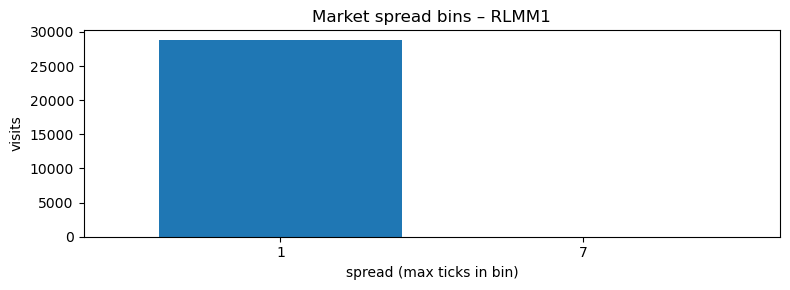

In [12]:
spread_bin_size = 1  # ticks

files = sorted(params['log_dir'].glob('RL_MM1_*.bz2'))
if not files:
    print(f'No RL_MM1 logs in {params["log_dir"]}')
else:
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print('No STATE events found')
    else:
        df = pd.DataFrame(list(state_rows['Event']))
        if 'spread' not in df.columns:
            print("No 'spread' field in STATE events")
        else:
            bins = (df['spread'].clip(lower=0) // spread_bin_size).astype(int)
            counts = bins.value_counts().sort_index()
            labels = [(b + 1) * spread_bin_size for b in counts.index]

            ax = counts.plot(kind='bar', figsize=(8, 3), width=0.8, color='C0')
            ax.set_title('Market spread bins – RLMM1')
            ax.set_ylabel('visits')
            ax.set_xticks(range(len(counts)))
            ax.set_xticklabels(labels, rotation=0)
            ax.set_xlabel('spread (max ticks in bin)')
            plt.tight_layout()


No SIMPLE_MM_*.bz2 found in ../log/simple_seed_123456


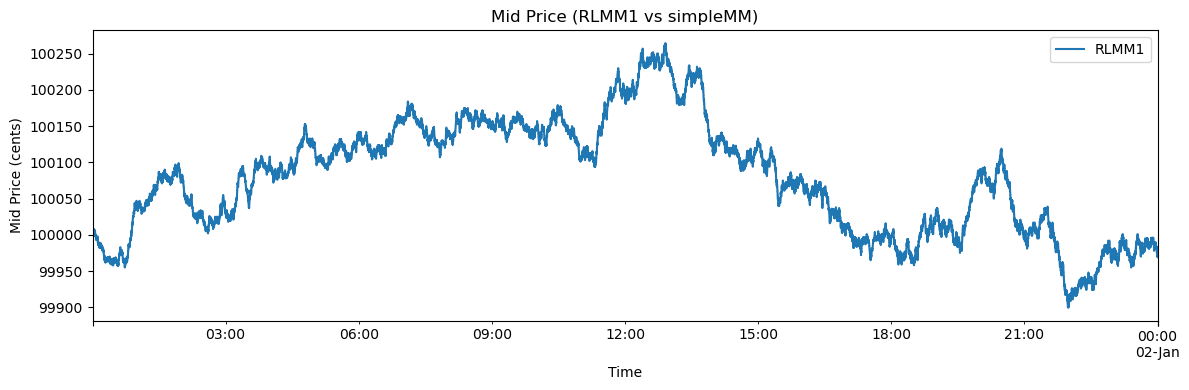

In [13]:
# Mid-price overlay for RLMM1, simpleMM, and orderbook mid
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']
orderbook_file = params['log_dir'] / 'ORDERBOOK_AAPL_FULL.bz2'

def mid_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'mid' not in df.columns:
        print(f"No 'mid' field in {files[0].name}")
        return None
    return df['mid'].rename(label)

rl_mid = mid_from_state(log_dir, 'RL_MM1_*.bz2', 'RLMM1')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')

top_mid = None
if 'orderbook_file' in globals() and orderbook_file and orderbook_file.exists():
    ob = pd.read_pickle(orderbook_file)

    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None

    bid_price_col = find_col(ob.columns, ['best', 'bid']) or find_col(ob.columns, ['bid', 'price'])
    ask_price_col = find_col(ob.columns, ['best', 'ask']) or find_col(ob.columns, ['ask', 'price'])
    if bid_price_col and ask_price_col:
        top = ob[[bid_price_col, ask_price_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2
        top['spread'] = top['best_ask_price'] - top['best_bid_price']
        top_mid = top['mid'].rename('orderbook_mid')
        top[['spread']].plot(figsize=(10, 3), title='Quoted spread', legend=True)
        plt.tight_layout()
else:
    print('Orderbook file not found')

series = [s for s in [rl_mid, simple_mid, top_mid] if s is not None]
if series:
    mid_df = pd.concat(series, axis=1).sort_index()
    mid_df.plot(figsize=(12, 4), title='Mid Price (RLMM1 vs simpleMM)')
    plt.xlabel('Time')
    plt.ylabel('Mid Price (cents)')
    plt.tight_layout()
else:
    print('No midprice series available to plot')


### Q-values over time


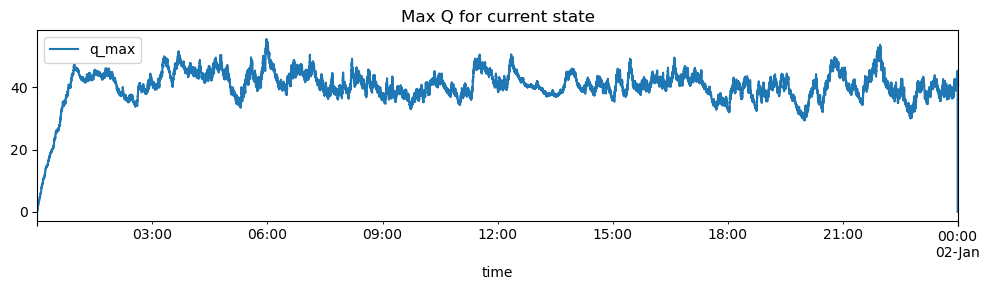

In [14]:
if rl_state is not None and not rl_state.empty and 'q_max' in rl_state.columns:
    rl_state['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    #if 'greedy_action' in rl_state.columns:
        #rl_state['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
     #   plt.legend()
      #  plt.tight_layout()
else:
    print('No Q info in STATE events')


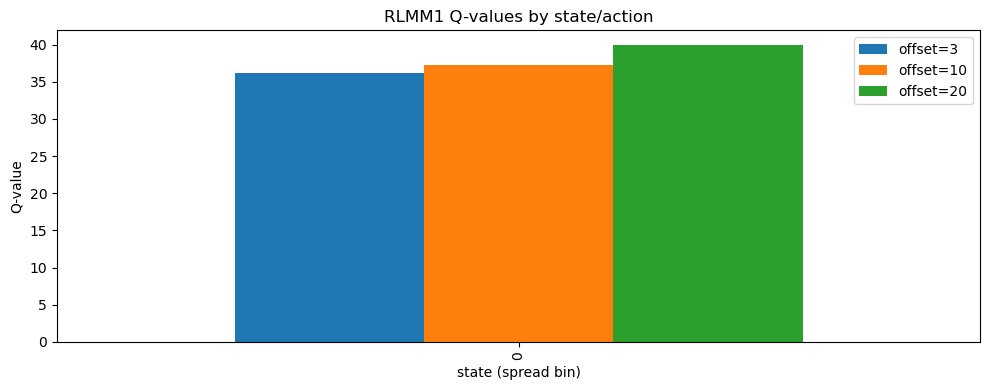

In [15]:
import pickle
q_file = params['log_dir'] / 'q_table.pkl'
if q_file.exists():
    with open(q_file, 'rb') as f:
        q_table = pickle.load(f)
    q_df = pd.Series(q_table).unstack(fill_value=0).sort_index()
    q_df.columns = [f"offset={o}" for o in [3, 10, 20][:q_df.shape[1]]]
    ax = q_df.plot(kind='bar', figsize=(10,4), width=0.8)
    ax.set_title("RLMM1 Q-values by state/action")
    ax.set_xlabel("state (spread bin)")
    ax.set_ylabel("Q-value")
    plt.tight_layout()
else:
    print(f"Missing {q_file}; rerun simulation to create it.")

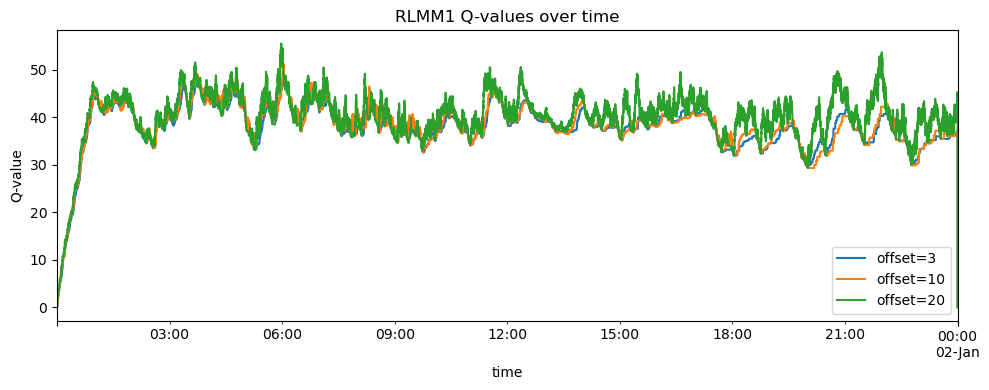

In [16]:
# Q-value evolution for RLMM1
offsets = [3, 10, 20]  # keep in sync with RLMM1 config

rl_files = sorted(params['log_dir'].glob('RL_MM1_*.bz2'))
if not rl_files:
    print(f'No RL_MM1 logs in {params["log_dir"]}')
else:
    log = pd.read_pickle(rl_files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print('No STATE events found')
    else:
        df = pd.DataFrame(list(state_rows['Event']))
        if 'q_values' not in df.columns:
            print("No 'q_values' field in STATE events (rerun sim after code change).")
        else:
            q_mat = pd.DataFrame(df['q_values'].tolist(), index=pd.to_datetime(df['time']))
            q_mat = q_mat.iloc[:, :len(offsets)]  # guard if shapes differ
            q_mat.columns = [f"offset={o}" for o in offsets[:q_mat.shape[1]]]
            ax = q_mat.plot(figsize=(10, 4), title='RLMM1 Q-values over time')
            ax.set_xlabel('time')
            ax.set_ylabel('Q-value')
            plt.tight_layout()
